In [10]:
import nicepy as npy
from scipy import constants
%matplotlib inline

In [161]:
names = ['x', 'y', 'b']
data1 = pd.read_csv('data1.csv', names=names)
data1.name='data1'
data2 = pd.read_csv('data2.csv', names=names)
data2.name='data2'
data3 = pd.read_csv('data3.csv', names=names)
data3.name='data3'
datas = [data1, data2, data3]

In [204]:
def plot_linearity(data, figsize=(5*constants.golden, 5), **kwargs):
    fig, ax = plt.subplots(figsize=figsize, dpi=300)
    temp = data.groupby('b')
    for b, df in temp:
        df.plot.line(x='x', y='y', linestyle='', marker='o', ax=ax, **kwargs)
    ax.set_ylabel('y')
    return fig, ax

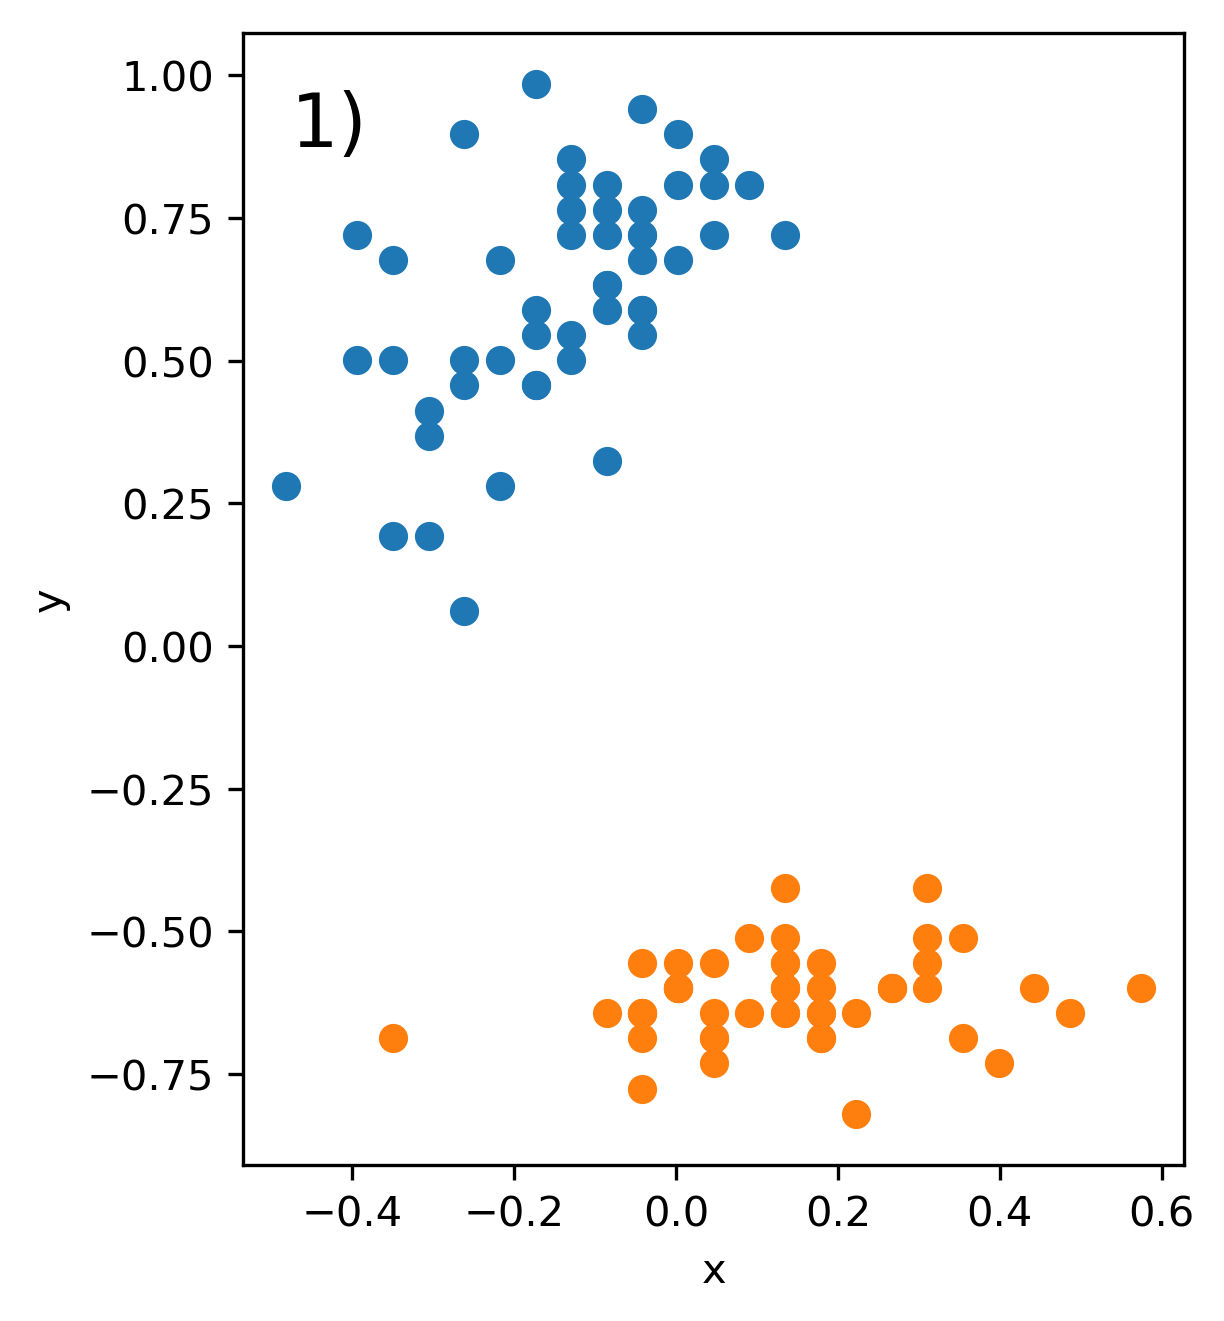

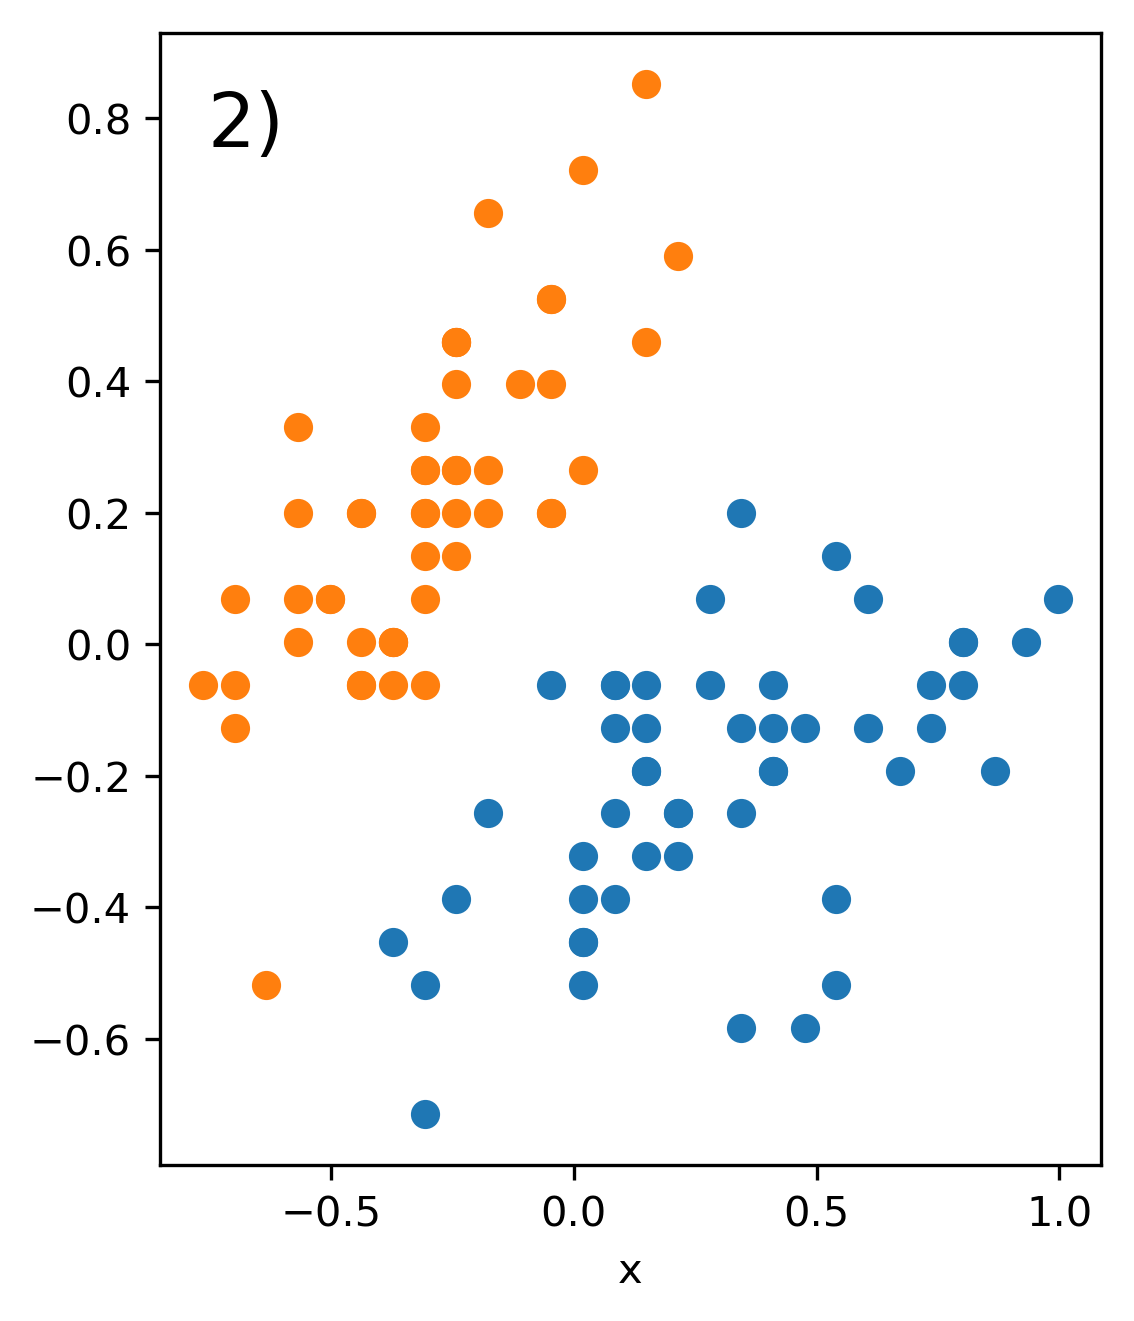

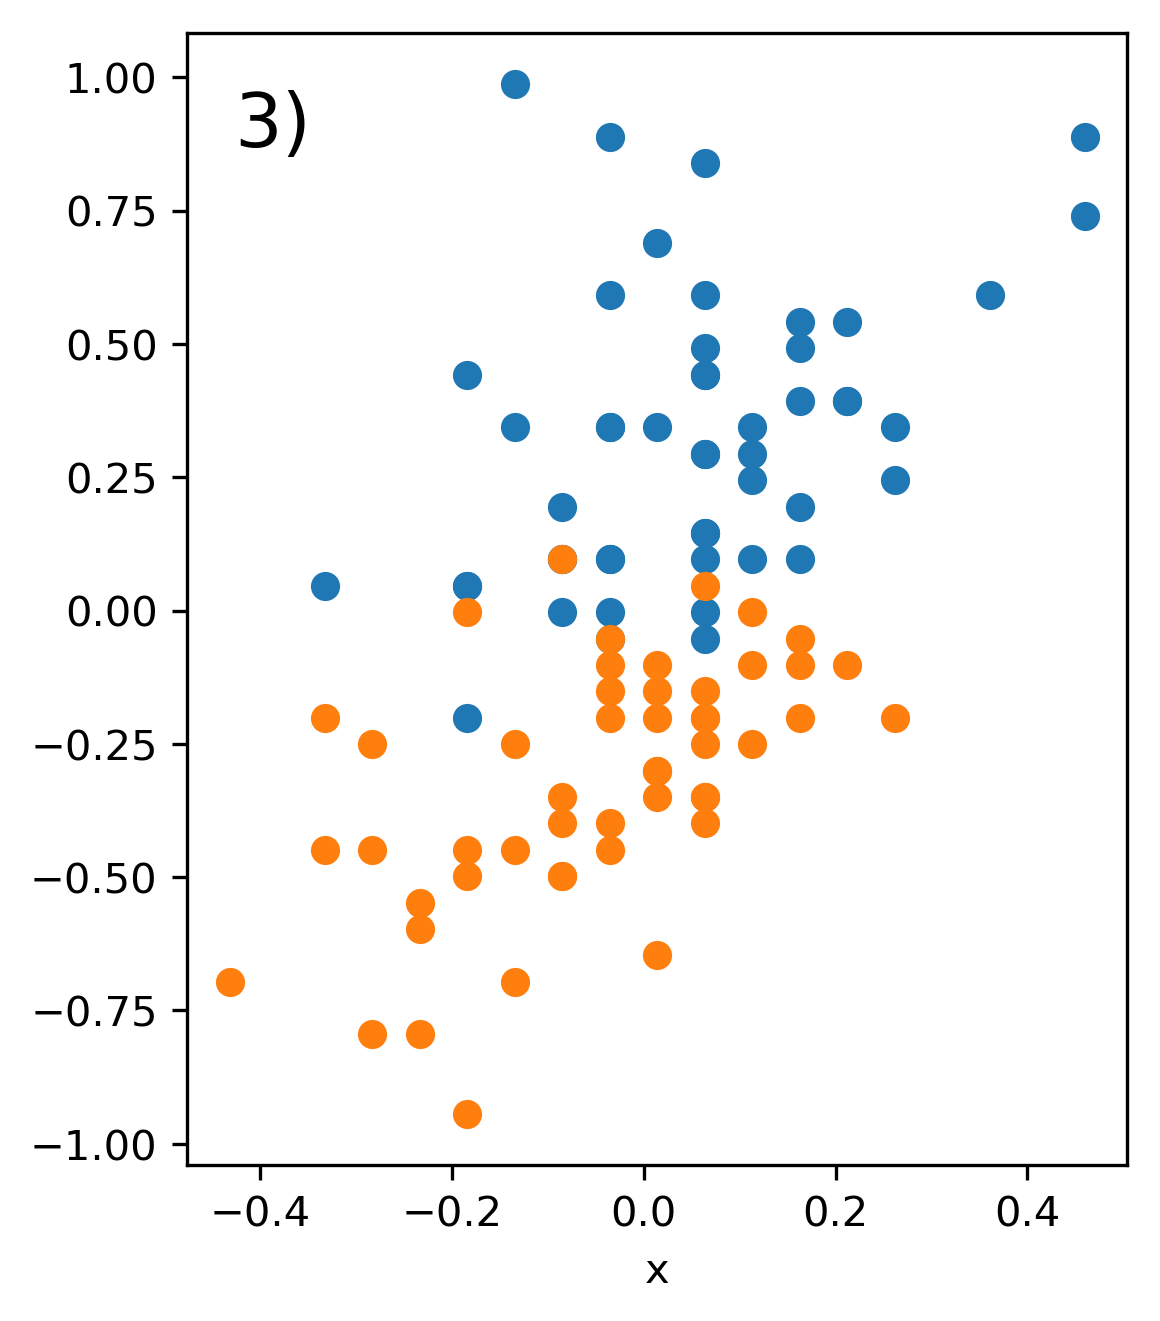

In [211]:
i = 1
for data in datas:
    fig, ax = plot_linearity(data, figsize=(5*constants.golden/2, 5))
    if i is not 1:
        ax.set_ylabel('')
    ax.get_legend().remove()
    ax.grid(False)
    ax.text(0.05, 0.9, '%s)' %i, fontsize=18, transform=ax.transAxes)
    i += 1
    fig.savefig(data.name+'.png', bbox_inches='tight')

In [228]:
def train_perceptron(X, F, maxiter):
    d = len(X[0])
    w = np.zeros(d)
    b = 0
    updates = 0
    for i in range(maxiter):
        changed = False
        for x, f in zip(X, F):
            test = f * (np.dot(x, w) + b)
            if test <= 0:
                w += f * x
                b += f
                changed = True
                updates += 1
        if not changed:
            break
    return updates, w, b

def linear(x, w, b):
    x = np.array(x)
    m = -w[0]/w[1]
    b = -b/w[1]
    output = m * x + b
    return output

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


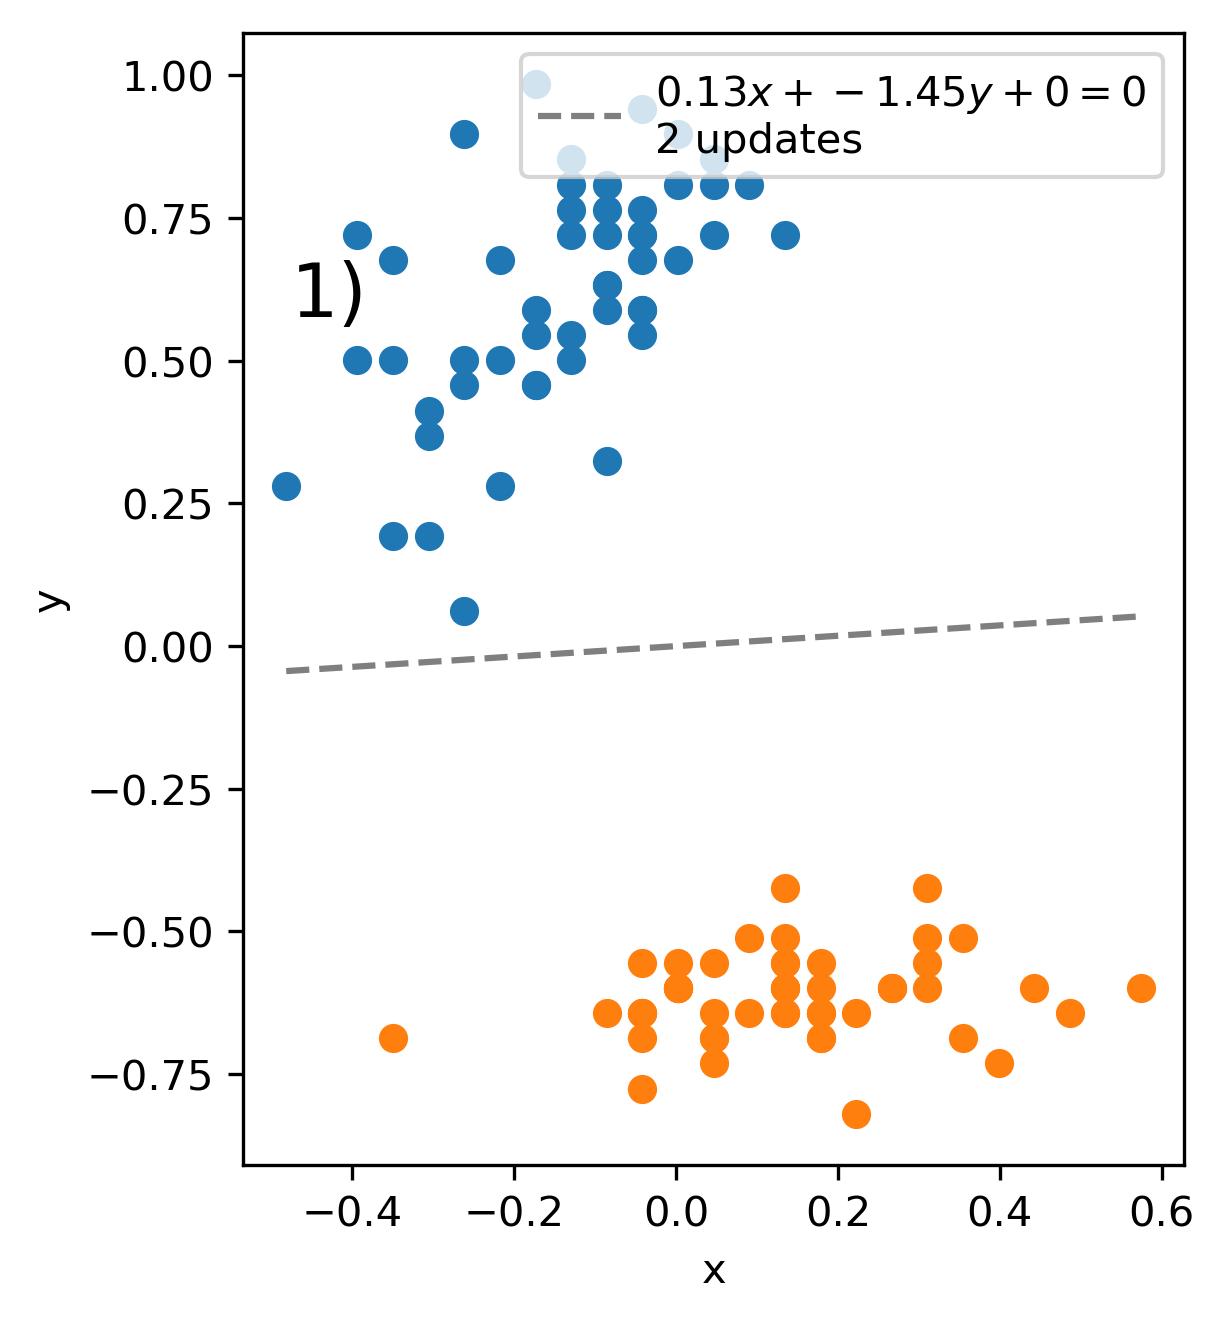

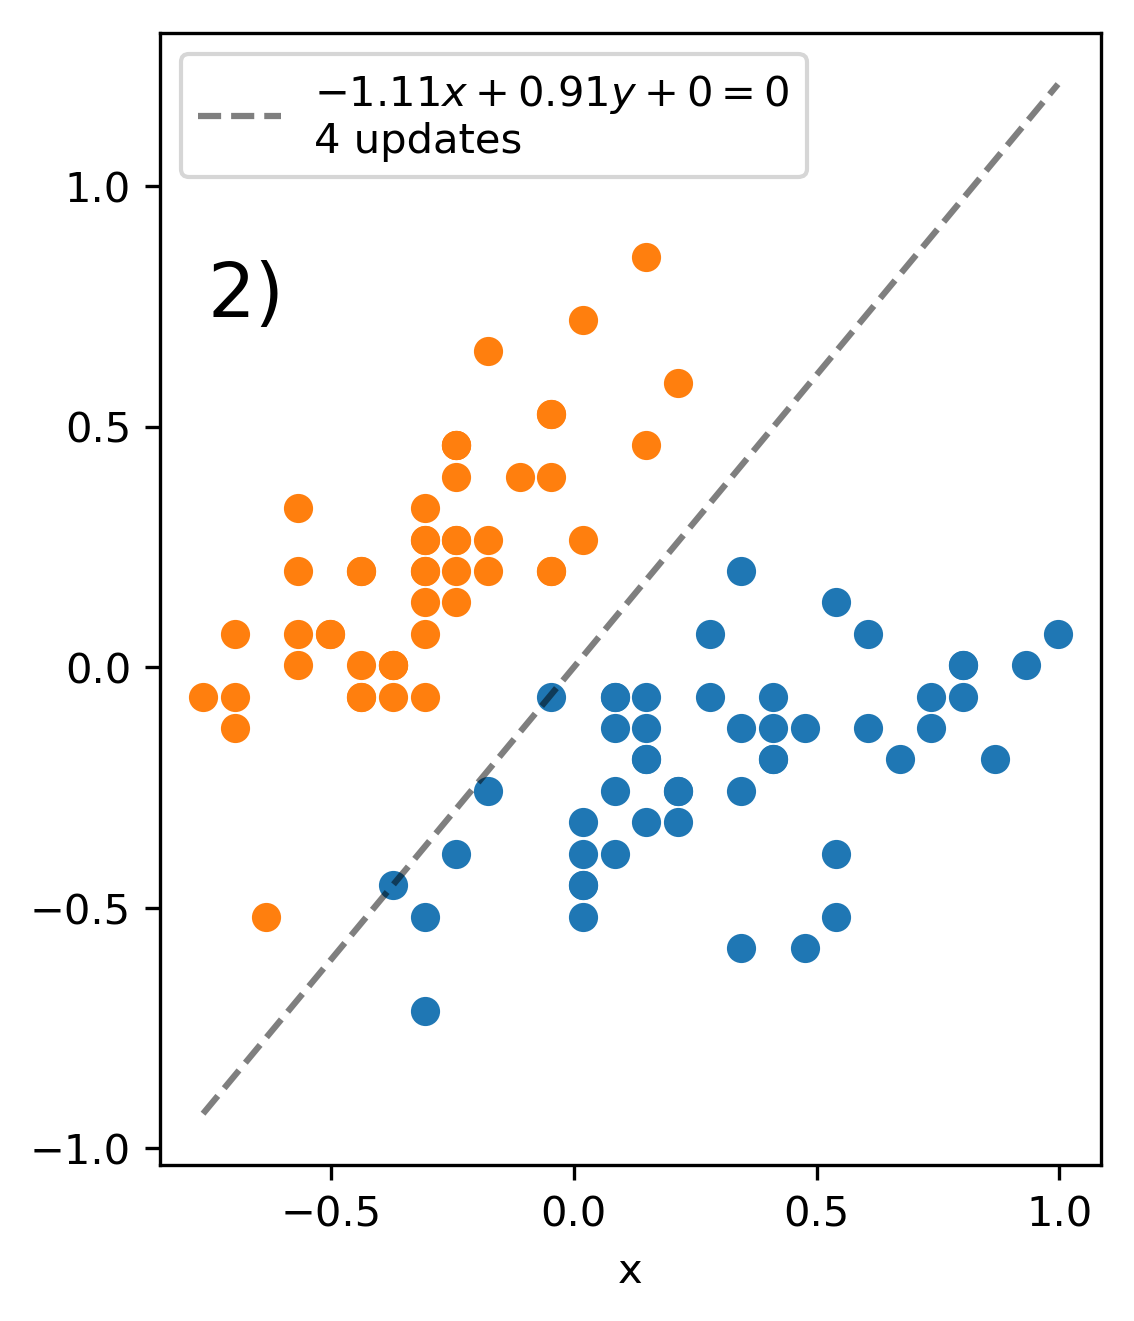

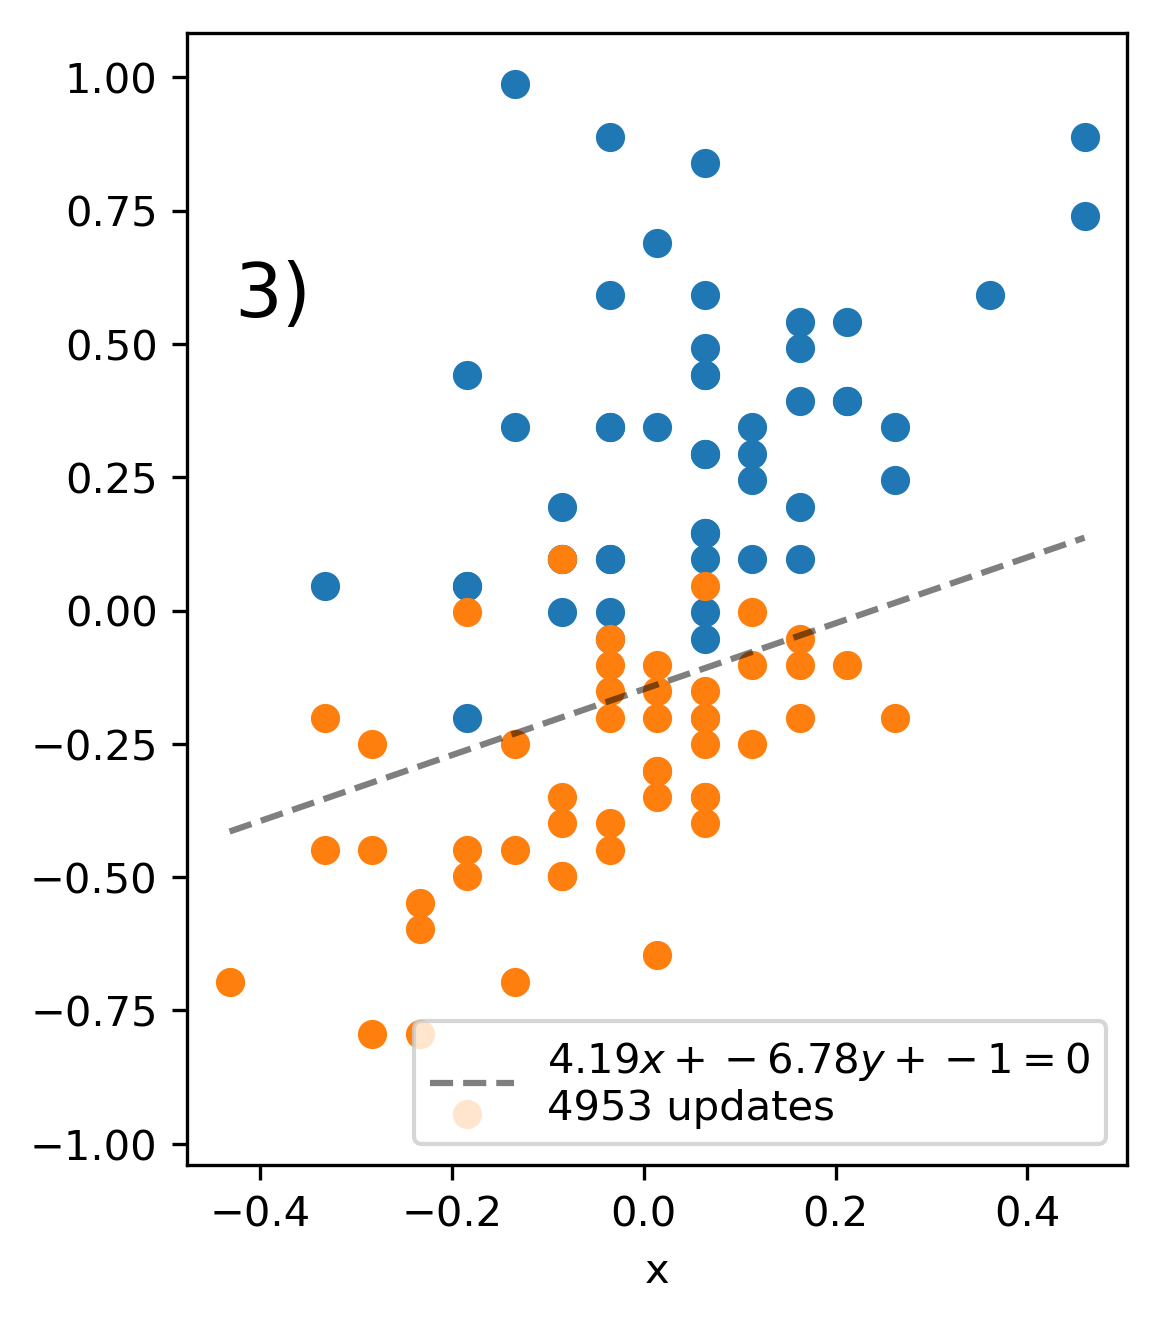

In [229]:
ii_list = []
X_list = []
w_list = []
b_list = []
ii = 1
for data in datas:
    X = data[['x', 'y']].as_matrix()
    F = data['b'].as_matrix()
    i, w, b = train_perceptron(X, F, 1000)
    
    fig, ax = plot_linearity(data, figsize=(5*constants.golden/2, 5), label='')
    xfit = np.linspace(data['x'].min(), data['x'].max(), 100)
    label = '$%.02fx + %.02fy + %i = 0$\n%i updates' %(w[0], w[1], b, i)
    ax.text(0.05, 0.75, '%s)' %ii, fontsize=18, transform=ax.transAxes)

    ax.plot(xfit, linear(xfit, w, b), linestyle='--', color='k', alpha=0.5, label=label)
    ax.legend()
    if ii is not 1:
        ax.set_ylabel('')
    fig.savefig('trained_%i.png' %(ii), bbox_inches='tight')
    
    ii_list.append(ii)
    X_list.append(X)
    w_list.append(w)
    b_list.append(b)
    
    ii += 1

In [218]:
def distance_from_hyperplane(x, w, b):
    w_norm = np.sqrt(np.dot(w, w))
    return abs(np.dot(w, x) + b)/w_norm

In [236]:
gammas = []

for ii, W, b, X in zip(ii_list, w_list, b_list, X_list):
    g = min([distance_from_hyperplane(x, w, b) for x in X])
    s = 'gamma_%i = %.02f' %(ii, g)
    ss = 'k_%i = %i' %(ii, 1/g**2)
    print(s)
    print(ss)

gamma_1 = 0.19
k_1 = 27
gamma_2 = 0.01
k_2 = 7252
gamma_3 = 0.00
k_3 = 47195
